<a href="https://colab.research.google.com/github/everypidigit/diabetes_predict/blob/main/diabetes_predict.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import tensorflow
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [4]:
df = pd.read_csv('/content/drive/MyDrive/Datasets/diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


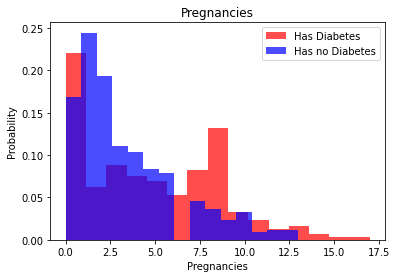

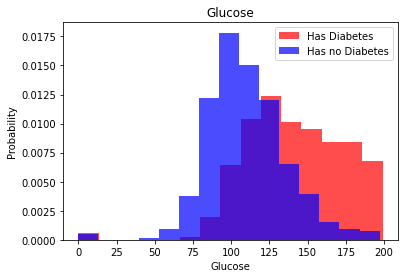

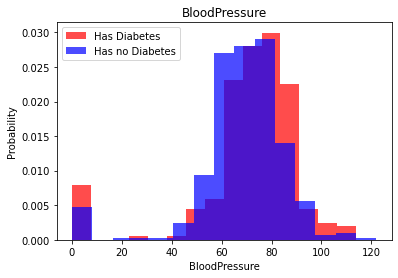

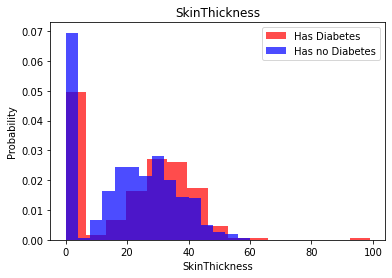

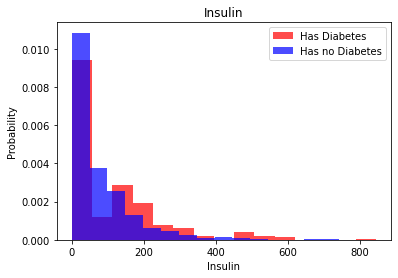

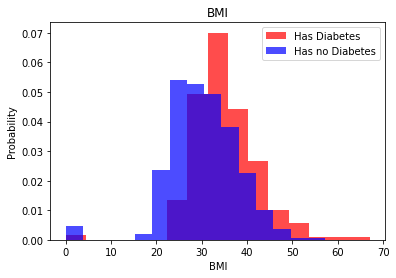

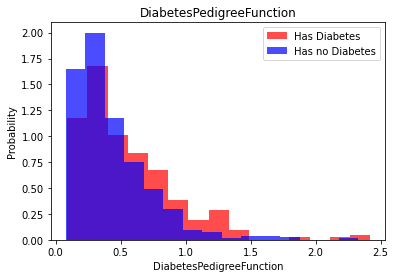

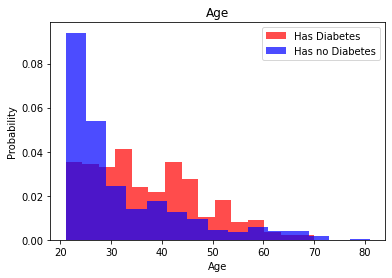

In [5]:
for i in range(len(df.columns[:-1])):
  label = df.columns[i]
  plt.hist(df[df['Outcome']==1][label], color = 'red', label='Has Diabetes',alpha=0.7, density=True, bins = 15)
  plt.hist(df[df['Outcome']==0][label], color = 'blue', label='Has no Diabetes',alpha=0.7, density=True, bins = 15)
  plt.title(label)
  plt.ylabel('Probability')
  plt.xlabel(label)
  plt.legend()
  plt.show()


In [17]:
X = df[df.columns[:-1]].values
y = df[df.columns[-1]].values

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size = 0.5, random_state = 0)
X_valid, X_test, y_valid, y_test = train_test_split(X, y, test_size = 0.5, random_state = 0)

#building the neural network itself: inside the sequential class, these are the neural network layers
model = tensorflow.keras.Sequential([
          tensorflow.keras.layers.Dense(16, activation = 'relu'),     #if x< 0 then this becomes 0, if x > 0, then becomes x
          tensorflow.keras.layers.Dense(16, activation = 'relu'), 
          tensorflow.keras.layers.Dense(16, activation = 'relu'), 
          tensorflow.keras.layers.Dense(24, activation = 'relu'), 
          tensorflow.keras.layers.Dense(1, activation = 'sigmoid')
])

model.compile(optimizer = tensorflow.keras.optimizers.Adam(learning_rate = 0.002),
              loss = tensorflow.keras.losses.BinaryCrossentropy(),
              metrics = ['accuracy']
)
model.evaluate(X_train, y_train)

12/12 [==============================] - 0s 2ms/step - loss: 4.2234 - accuracy: 0.6432


[4.223408222198486, 0.6432291865348816]

In [12]:
model.evaluate(X_valid, y_valid)

12/12 [==============================] - 0s 2ms/step - loss: 6.7084 - accuracy: 0.6432


[6.708401203155518, 0.6432291865348816]

In [26]:
model.fit(X_train, y_train, batch_size = 32, epochs = 24, validation_data = (X_valid, y_valid) )

Epoch 1/24
12/12 [==============================] - 0s 8ms/step - loss: 0.2884 - accuracy: 0.8724 - val_loss: 0.2584 - val_accuracy: 0.8984
Epoch 2/24
12/12 [==============================] - 0s 5ms/step - loss: 0.2927 - accuracy: 0.8698 - val_loss: 0.2823 - val_accuracy: 0.8906
Epoch 3/24
12/12 [==============================] - 0s 5ms/step - loss: 0.3095 - accuracy: 0.8802 - val_loss: 0.3084 - val_accuracy: 0.8672
Epoch 4/24
12/12 [==============================] - 0s 5ms/step - loss: 0.3263 - accuracy: 0.8438 - val_loss: 0.3157 - val_accuracy: 0.8542
Epoch 5/24
12/12 [==============================] - 0s 5ms/step - loss: 0.3288 - accuracy: 0.8438 - val_loss: 0.3163 - val_accuracy: 0.8542
Epoch 6/24
12/12 [==============================] - 0s 5ms/step - loss: 0.3311 - accuracy: 0.8516 - val_loss: 0.3132 - val_accuracy: 0.8516
Epoch 7/24
12/12 [==============================] - 0s 5ms/step - loss: 0.3365 - accuracy: 0.8516 - val_loss: 0.2771 - val_accuracy: 0.8880
Epoch 8/24
12/12 [==

In [27]:
model.fit(X_train, y_train, batch_size = 32, epochs = 30, validation_data = (X_valid, y_valid) )

Epoch 1/30
12/12 [==============================] - 0s 11ms/step - loss: 0.2877 - accuracy: 0.8828 - val_loss: 0.2679 - val_accuracy: 0.8828
Epoch 2/30
12/12 [==============================] - 0s 10ms/step - loss: 0.2954 - accuracy: 0.8594 - val_loss: 0.2873 - val_accuracy: 0.8880
Epoch 3/30
12/12 [==============================] - 0s 8ms/step - loss: 0.2890 - accuracy: 0.8776 - val_loss: 0.2876 - val_accuracy: 0.8646
Epoch 4/30
12/12 [==============================] - 0s 8ms/step - loss: 0.3055 - accuracy: 0.8568 - val_loss: 0.2636 - val_accuracy: 0.8854
Epoch 5/30
12/12 [==============================] - 0s 11ms/step - loss: 0.2801 - accuracy: 0.8802 - val_loss: 0.2601 - val_accuracy: 0.8828
Epoch 6/30
12/12 [==============================] - 0s 8ms/step - loss: 0.2753 - accuracy: 0.8724 - val_loss: 0.2449 - val_accuracy: 0.9141
Epoch 7/30
12/12 [==============================] - 0s 7ms/step - loss: 0.2686 - accuracy: 0.8932 - val_loss: 0.2508 - val_accuracy: 0.9089
Epoch 8/30
12/12 

In [29]:
model.fit(X_train, y_train, batch_size = 32, epochs = 12, validation_data = (X_valid, y_valid) )

Epoch 1/12
12/12 [==============================] - 0s 8ms/step - loss: 0.2724 - accuracy: 0.8776 - val_loss: 0.2604 - val_accuracy: 0.8802
Epoch 2/12
12/12 [==============================] - 0s 5ms/step - loss: 0.2816 - accuracy: 0.8568 - val_loss: 0.2757 - val_accuracy: 0.8724
Epoch 3/12
12/12 [==============================] - 0s 5ms/step - loss: 0.3069 - accuracy: 0.8646 - val_loss: 0.3032 - val_accuracy: 0.8464
Epoch 4/12
12/12 [==============================] - 0s 5ms/step - loss: 0.3361 - accuracy: 0.8307 - val_loss: 0.3382 - val_accuracy: 0.8594
Epoch 5/12
12/12 [==============================] - 0s 5ms/step - loss: 0.3307 - accuracy: 0.8359 - val_loss: 0.3453 - val_accuracy: 0.8594
Epoch 6/12
12/12 [==============================] - 0s 5ms/step - loss: 0.2987 - accuracy: 0.8828 - val_loss: 0.2882 - val_accuracy: 0.8620
Epoch 7/12
12/12 [==============================] - 0s 5ms/step - loss: 0.3034 - accuracy: 0.8646 - val_loss: 0.2782 - val_accuracy: 0.8802
Epoch 8/12
12/12 [==